# IMPORTING PACKAGES 

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# LOADING DATA

In [ ]:
data = pd.read_csv('KAGGLE/netflix_titles.csv')

In [366]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,month_added,usable data
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","[United States, India, South Korea, China]",2019-09-09,2019,90 min,"[Children & Family Movies, Comedies]",Before planning an awesome wedding for his gra...,September,Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",[United States],2017-09-08,2017,99 min,[Comedies],When nerdy high schooler Dani finally attracts...,September,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","[Bulgaria, United States, Spain, Canada]",2017-09-08,2014,110 min,"[International Movies, Sci-Fi & Fantasy, Thr...","In a dystopian future, an insurance adjuster f...",September,"In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,[Chile],2017-09-08,2017,60 min,[Stand-Up Comedy],Fabrizio Copano takes audience participation t...,September,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","[United States, United Kingdom, Denmark, Sw...",2017-09-08,2014,90 min,"[Action & Adventure, Thrillers]",A struggling couple can't believe their luck w...,September,A struggling couple can't believe their luck w...


In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


# DATA PRE-PROCESSING

In [298]:
data['month_added'] = data['date_added'].apply(lambda x: str(x).split()[0])

In [299]:
data['date_added'] = data['date_added'].apply(lambda x: pd.to_datetime(x))

In [300]:
data.drop(['rating'], axis=1, inplace=True)

In [301]:
tvshow = data[data['type'] == 'TV Show'].drop('type', axis=1)
movie = data[data['type'] == 'Movie'].drop('type', axis=1)

In [302]:
data['country'] = data['country'].apply(lambda x: str(x).split(','))
data['listed_in'] = data['listed_in'].apply(lambda x: str(x).split(','))

In [336]:
usable_data = []
for i in data.index:
    usable_data.append(data['description'][i])
    
data['usable data'] = usable_data

# VISUALIZING DATA

<AxesSubplot:xlabel='type', ylabel='count'>

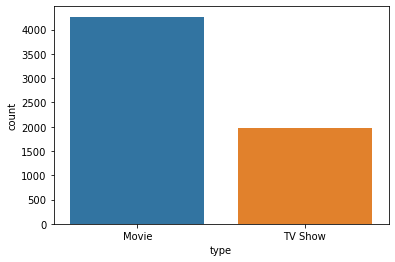

In [337]:
sns.countplot(x=data['type'])

<AxesSubplot:xlabel='release_year', ylabel='Count'>

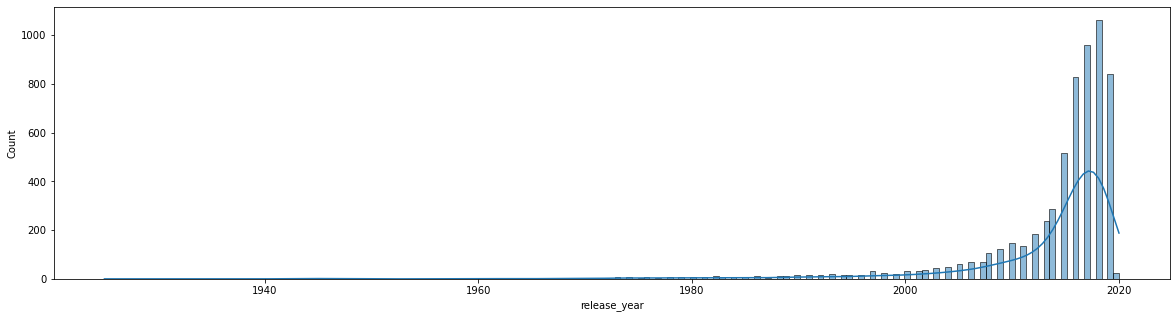

In [338]:
fig = plt.figure(figsize=(20,5))
sns.histplot(x=data['release_year'], kde=True)

<AxesSubplot:xlabel='duration', ylabel='Count'>

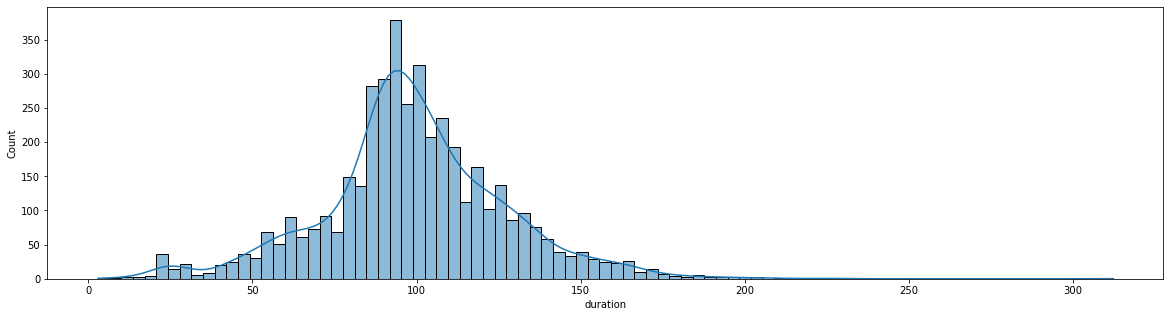

In [339]:
fig = plt.figure(figsize=(20,5))
sns.histplot(x=data[data['type']=='Movie']['duration'].apply(lambda x: int(x.split()[0])).sort_values(), kde=True)

<AxesSubplot:xlabel='duration', ylabel='Count'>

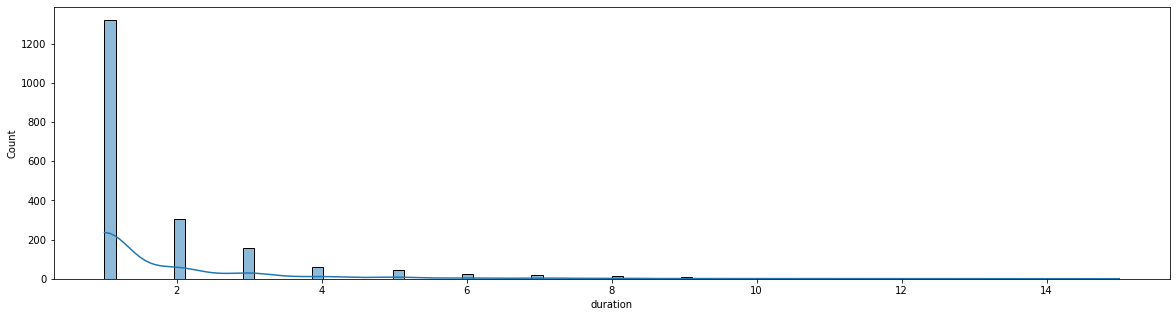

In [340]:
fig = plt.figure(figsize=(20,5))
sns.histplot(x=data[data['type']=='TV Show']['duration'].apply(lambda x: int(x.split()[0])).sort_values(), kde=True)

<AxesSubplot:xlabel='genre', ylabel='count'>

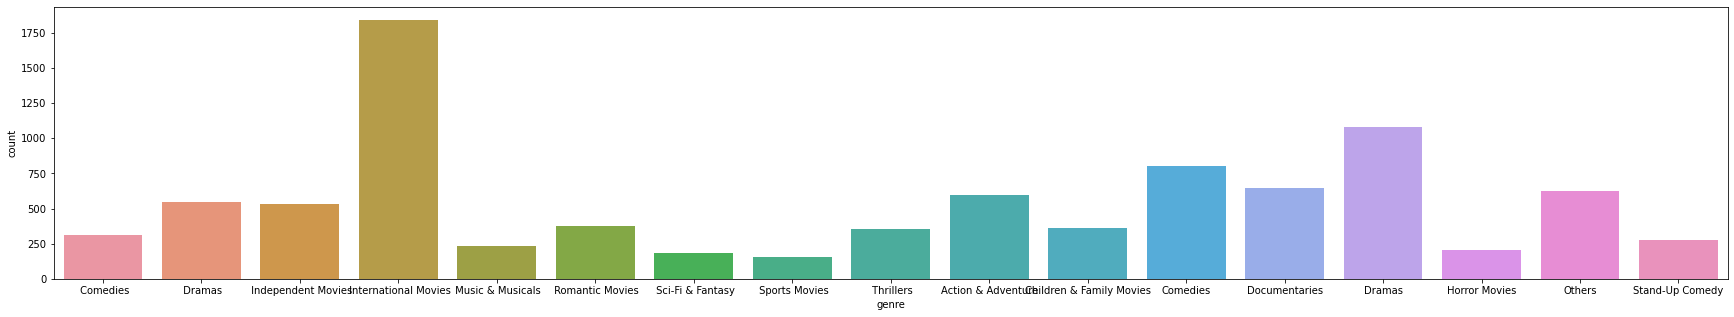

In [341]:
genres = []
for i in data[data['type']=='Movie']['listed_in']:
    for x in i:
        genres.append(x)
        
df = pd.DataFrame([genres, [genres.count(x) for x in genres]]).transpose()
df.columns = ['genre', 'count']
df = df.drop_duplicates()

for i in df.index:
    if df['count'][i] <= 100:
        df['genre'][i] = 'Others'
        
df = df.groupby('genre').sum()

fig = plt.figure(figsize=(30,5))
sns.barplot(x=df.index, y=df['count'])

# BUILDING A RECOMMENDER MODEL

In [342]:
data.dropna(inplace=True)

In [345]:
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')

In [349]:
x = data['usable data']
vec_data = tfidf.fit_transform(x)

In [355]:
tfidf_df = pd.DataFrame(vec_data.toarray(), columns=tfidf.get_feature_names())
tfidf_df.index = data['title']

In [360]:
tfidf_df.head()

,000,007,10,100,1000,10th,11,112,11th,12,...,zoya,zoé,zuhu,zurich,álex,álvaro,émile,über,ōarai,şeref
title,,,,,,,,,,,,,,,,,,,,,
Norm of the North: King Sized Adventure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#realityhigh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Automata,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fabrizio Copano: Solo pienso en mi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Good People,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [357]:
cos_sim = cosine_similarity(tfidf_df)

In [358]:
cos_sim_df = pd.DataFrame(cos_sim, index=tfidf_df.index, columns=tfidf_df.index)

In [361]:
cos_sim_df.head()

title,Norm of the North: King Sized Adventure,#realityhigh,Automata,Fabrizio Copano: Solo pienso en mi,Good People,Joaquín Reyes: Una y no más,Kidnapping Mr. Heineken,Krish Trish and Baltiboy: Battle of Wits,Krish Trish and Baltiboy: Best Friends Forever,Krish Trish and Baltiboy: Comics of India,...,Comedians in Cars Getting Coffee,The Cat in the Hat Knows a Lot About That!,Fullmetal Alchemist: Brotherhood,Merlin,Abnormal Summit,The Great British Baking Show,Miraculous: Tales of Ladybug & Cat Noir,Sacred Games,Men on a Mission,Leyla and Mecnun
title,,,,,,,,,,,,,,,,,,,,,
Norm of the North: King Sized Adventure,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.053526,...,0.0,0.0,0.0,0.054115,0.0,0.0,0.000000,0.0,0.000000,0.0
#realityhigh,0.0,1.0,0.0,0.0,0.0,0.054364,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.057092,0.0,0.027633,0.0
Automata,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Fabrizio Copano: Solo pienso en mi,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.018766,0.0,0.0,0.000000,0.0,0.000000,0.0
Good People,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.085988,0.0


In [494]:
def recommender(name, number):
    print('The ' + str(number) + ' most similar Movies/TV Shows to ' + name + ' are:')
    for i in cos_sim_df[name].sort_values(ascending=False).index[1:number+1]:
        print(i)
    return cos_sim_df[name].sort_values(ascending=False).index[1:number+1]

# EXAMPLE

In [495]:
recommender("Luck by Chance", 5)

The 5 most similar Movies/TV Shows to Luck by Chance are:
Good People
Men on a Mission
Romeo Akbar Walter
Bandie
The Wedding Curse


Index(['Good People', 'Men on a Mission', 'Romeo Akbar Walter', 'Bandie',
       'The Wedding Curse'],
      dtype='object', name='title')